In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# !wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

In [ ]:
# !unzip bank+marketing.zip 
# !unzip bank.zip

In [4]:
df = pd.read_csv('bank-full.csv', sep=';')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
selected = [
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y'
]

In [10]:
dfn = df[selected]
dfn.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
dfn['y'] = (dfn['y'] == 'yes').astype('int64')

C:\Users\Excellus\AppData\Local\Temp\ipykernel_20668\1241618025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['y'] = (dfn['y'] == 'yes').astype('int64')


In [12]:
dfn.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
dfn.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_full_train, df_test = train_test_split(dfn, test_size=0.2, random_state=1)

In [16]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [17]:
len(df_train), len(df_test), len(df_val)

(27126, 9043, 9042)

In [18]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_train.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,56,entrepreneur,married,tertiary,40,no,cellular,11,jul,123,2,-1,0,unknown,0
1,33,technician,married,secondary,4790,yes,cellular,20,apr,137,1,272,2,failure,0
2,32,technician,single,tertiary,392,yes,cellular,21,nov,148,2,-1,0,unknown,0
3,40,admin.,divorced,secondary,2129,no,cellular,30,apr,452,1,-1,0,unknown,1
4,54,unemployed,married,tertiary,1180,no,cellular,19,nov,394,2,-1,0,unknown,0


In [19]:
y_train = df_train['y']
del df_train['y']
y_test = df_test['y']
del df_test['y']
y_val = df_val['y']
del df_val['y']

In [20]:
numerical = [c for c in df_train.columns if dfn[c].dtypes != 'object']
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [21]:
#importing more libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [22]:
for num in numerical:
    auc = roc_auc_score(y_train, df_train[num])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[num])
    print(f"{num:>16}, {auc:.3f}")

             age, 0.512
         balance, 0.589
             day, 0.526
        duration, 0.815
        campaign, 0.571
           pdays, 0.590
        previous, 0.599


In [23]:
y_train.head()

0    0
1    0
2    0
3    1
4    0
Name: y, dtype: int64

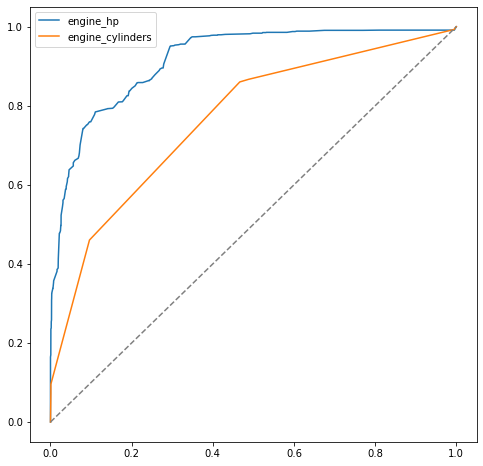

In [36]:
plt.figure(figsize=(8,8))

fpr, tpr, _ = roc_curve(y_train, df_train.engine_hp)
plt.plot(fpr, tpr, label = 'engine_hp')

fpr, tpr, _ = roc_curve(y_train, df_train.engine_cylinders)
plt.plot(fpr, tpr, label = 'engine_cylinders')

plt.plot([0,1],[0,1], color = 'grey', linestyle = '--')

plt.legend()
plt.show()

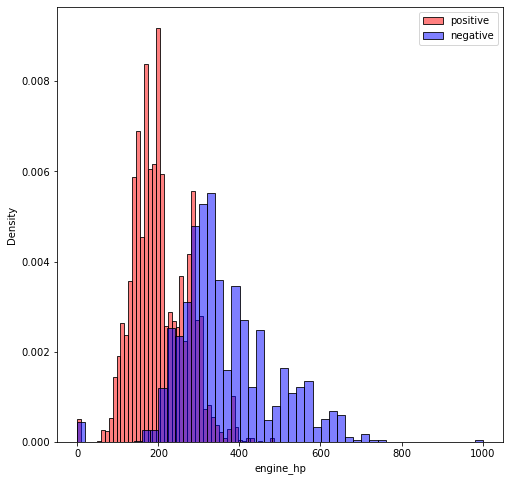

In [43]:
plt.figure(figsize=(8,8))

sns.histplot(df_train.engine_hp[y_train==0],
            stat='density', bins = 50,
            color = 'red', alpha=0.5,
            label='positive')

sns.histplot(df_train.engine_hp[y_train==1],
            stat='density', bins = 50,
            color = 'blue', alpha=0.5,
            label='negative')

plt.legend()
plt.show()

In [45]:
from sklearn.feature_extraction import DictVectorizer

In [46]:
dv = DictVectorizer(sparse=False) 
train_dict = df_train.to_dict(orient= 'records')

X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient= 'records')

X_val = dv.transform(val_dict)

In [47]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

preed = model.predict(X_val)
y_predv = model.predict_proba(X_val)[:,1]

In [50]:
rocv = round(roc_auc_score(y_val, y_predv), 3)
rocc = round(roc_auc_score(y_val, preed), 3)

rocv, rocc, roc_auc_score(y_val, y_predv)

(1.0, 0.996, 0.9999938095061224)

In [55]:
def confusion_matrixx(y_val, y_pred):
    scores = []
    
    thresholds = np.linspace(0, 1, 101)
    
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
   
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
    
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
    
        scores.append((t, tp, fp, fn, tn))
        
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
   
    return df_score

In [56]:
df_score = confusion_matrixx(y_val, y_predv)
df_score.head()

,threshold,tp,fp,fn,tn
0,0.00,654,1729,0,0
1,0.01,654,44,0,1685
2,0.02,654,37,0,1692
3,0.03,654,32,0,1697
4,0.04,654,31,0,1698


In [57]:
df_score[::5]

,threshold,tp,fp,fn,tn
0,0.00,654,1729,0,0
5,0.05,654,28,0,1701
10,0.10,654,19,0,1710
15,0.15,654,15,0,1714
20,0.20,654,13,0,1716
25,0.25,654,7,0,1722
30,0.30,654,4,0,1725
35,0.35,654,3,0,1726
40,0.40,654,1,0,1728
45,0.45,652,1,2,1728


In [58]:
df_score['p'] = df_score.tp / (df_score.tp + df_score.fp)
df_score['r'] = df_score.tp / (df_score.tp + df_score.fn)

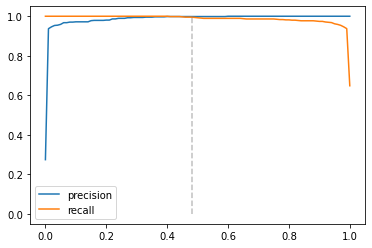

In [59]:
plt.plot(df_score.threshold, df_score.p, label='precision')
plt.plot(df_score.threshold, df_score.r, label='recall')
plt.vlines(0.48, 0, 1, color='grey', linestyle='--', alpha=0.5)


plt.legend()
plt.show()

In [60]:
df_score['f1'] = 2 * df_score.p * df_score.r / (df_score.p + df_score.r)

In [61]:
df_score.loc[df_score.f1.argmax()]

threshold       0.400000
tp            654.000000
fp              1.000000
fn              0.000000
tn           1728.000000
p               0.998473
r               1.000000
f1              0.999236
Name: 40, dtype: float64

In [62]:
from sklearn.model_selection import KFold

In [65]:
columns = list(dfn.columns)
columns.remove('above_average')
columns

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'price']

In [66]:
def train(df_train, y_train, C=1.0):
    
    dicts = df_train[columns].to_dict(orient='records')
    
    dv = DictVectorizer()
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model
    
def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [69]:
scores = []
    
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
          df_train = df_full_train.iloc[train_idx]
          df_val = df_full_train.iloc[val_idx]
    
          y_train = df_train.above_average.values
          y_val = df_val.above_average.values
    
          dv, model = train(df_train, y_train, C=1.0)
          y_pred = predict(df_val, dv, model)
    
          auc = roc_auc_score(y_val, y_pred)
          scores.append(auc)
    
print(f"{np.mean(scores):.3f} +- {np.std(scores):3f}")

1.000 +- 0.000003


In [71]:
from tqdm.auto import tqdm

In [75]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in tqdm([0.01, 0.1, 0.5, 10]):
    scores = []
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.above_average.values
        y_val = df_val.above_average.values
    
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    
    print(f"C={C:>4}, {np.mean(scores):.3f} +- {np.std(scores):3f}")

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01, 1.000 +- 0.000003
C= 0.1, 1.000 +- 0.000003
C= 0.5, 1.000 +- 0.000003
C=  10, 1.000 +- 0.000003
